# 前書き

データ分析に必要な⽂字列の操作とpandasを利⽤して分析しやすいデータの作成⽅法を紹介する。

# 1. ⽂字の埋め込み

⽂字列を扱う際、特定の位置に値を埋め込むための⽅法がPythonには⽤意されている。

ここでは、その⽅法について紹介する。


## 1-1. 基本的な使い⽅

文字列オブジェクト.format メソッドを利⽤することで値を⽂字列に埋め込むことができる。

下記に利⽤⽅法を⽰す。

image.png

下記に基本的な利⽤例を⽰す。

In [ ]:
name = 'Taro'
age = 40
height = 170.5
a = 'I am {}. My age is {}. My height is {}cm.'.format(name, age, height)
print(a)

flg = True
b = 'That is {}.'.format(flg)
print(b)

I am Taro. My age is 40. My height is 170.5cm.
That is True.


このように、変数の型によらずに表⽰できることも特徴である。

## 1-2. 書式の設定

{:d} のように指定することで表⽰する値の書式を設定できる。

下記に代表的な例を⽰す。

In [ ]:
import math

# ゼロ埋め5桁表示 (0表示幅)
print('zero padding: {:05}'.format(100))

# 2進数、8進数、16進数(b、o、x)
print('bin: {:b}'.format(10))
print('oct: {:o}'.format(10))
print('hex: {:x}'.format(10))

# 小数点以下の桁数(.桁数f)
val = 12345.6789
print('val is {}'.format(val))
print('val is {:.1f}'.format(val))

zero padding: 00100
bin: 1010
oct: 12
hex: a
val is 12345.6789
val is 12345.7


# 2. 正規表現


## 2-1. 正規表現とは

正規表現とは様々な⽂字列を1つのパターンで表現する表記⽅法である。

⾔葉だけだと意味が分かりにくいため、具体例を⽰し説明する。

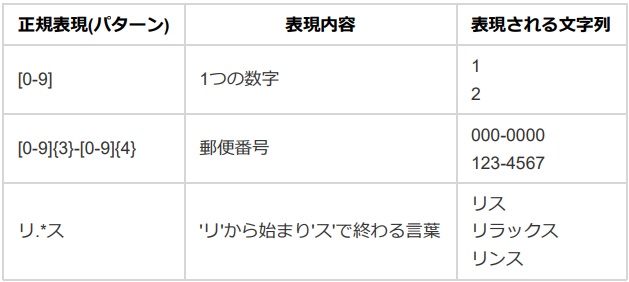


このように特殊な記号のパターンを⽤いることで⽂字列を表現する。


## 2-2. 正規表現⼀覧

代表的な正規表現を⽰す。

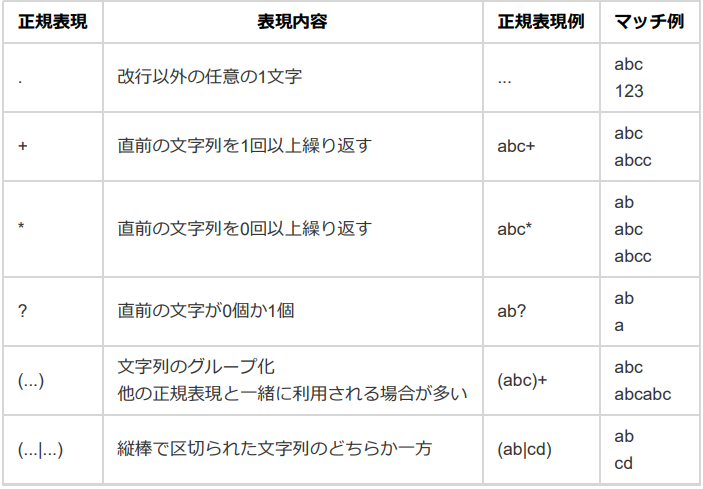

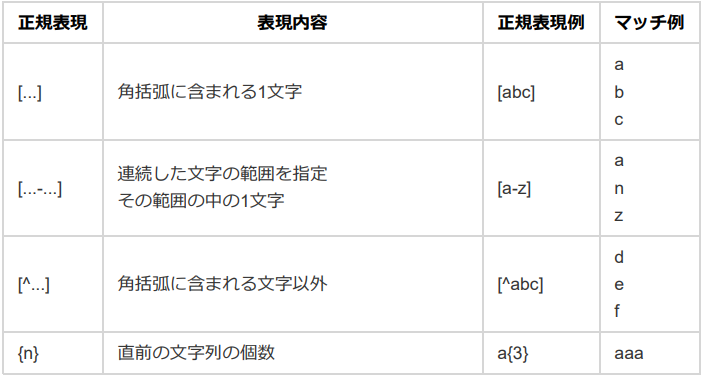

Pythonでは正規表現の中でよく利⽤されるパターンは簡単に記載できるように別の表現が定義されている。

代表的な定義済みの正規表現を⽰す。

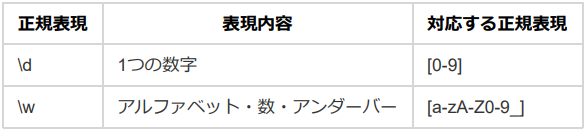

## 2-3. 正規表現を扱う関数

### re.match、re.search、re.fullmatch

re.match, re.search、re.fullmatch関数 を利⽤することで正規表現と⽂字列のパターンマッチができる。

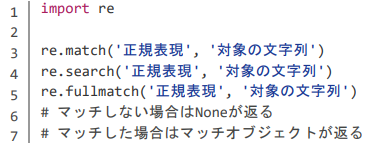

re.match 関数を利⽤したパターンマッチの基本的な例を⽰す。

re.match, re.search, re.fullmatch 関数の違いは後ほど説明する。

In [ ]:
import re

# 下記を利用して、マッチの有無を表す
# bool関数にNoneを渡すとFalseが返る
# bool関数にマッチオブジェクトを渡すとTrueが返る
print("bool(None) = {}".format(bool(None)))

bool(None) = False


In [ ]:
#.*の例(a'から始まりc'で終わる文字)
print()
pattern= 'a.*c'
str_tar = 'ac'
m = re.match(pattern,str_tar)
print("a.*c match 'ac': {}".format(bool(m)))

str_tar = 'abc'
m = re.match(pattern,str_tar)
print("a.*c match 'abc': {}".format(bool(m)))

str_tar = 'abbc'
m = re.match(pattern,str_tar)
print("a.*c match 'abbc': {}".format(bool(m)))

str_tar = 'ab'
m = re.match(pattern,str_tar)
print("a.*c match 'ab': {}".format(bool(m)))


a.*c match 'ac': True
a.*c match 'abc': True
a.*c match 'abbc': True
a.*c match 'ab': False


In [ ]:
#+の例('a'から始まり'b'が1回以上繰り返す文字)
print()
pattern= 'ab+'
str_tar = 'a'
m = re.match(pattern,str_tar)
print("ab+ match 'a': {}".format(bool(m)))

str_tar = 'ab'
m = re.match(pattern,str_tar)
print("ab+ match 'ab': {}".format(bool(m)))

str_tar = 'abb'
m = re.match(pattern,str_tar)
print("ab+ match 'abb': {}".format(bool(m)))


ab+ match 'a': False
ab+ match 'ab': True
ab+ match 'abb': True


In [ ]:
#?の例('http'と'https')
print()
pattern= 'https?'
str_tar = 'http'
m = re.match(pattern,str_tar)
print("https? match 'http': {}".format(bool(m)))

str_tar='https'
m = re.match(pattern,str_tar)
print("https? match 'https': {}".format(bool(m)))


https? match 'http': True
https? match 'https': True


In [ ]:
#\dの例(1つの数字)
print()
pattern='\d'
str_tar = '1'
m = re.match(pattern,str_tar)
print("\d match '1': {}".format(bool(m)))

str_tar='a'
m = re.match(pattern,str_tar)
print("\d match 'a': {}".format(bool(m)))


\d match '1': True
\d match 'a': False


In [ ]:
# [^...]の例 (a,b,c以外の1文字)
print()
pattern = '[^abc]'
str_tar = 'a'
m = re.match(pattern, str_tar)
print("[^abc] match 'a': {}".format(bool(m)))

str_tar = 'd'
m = re.match(pattern, str_tar)
print("[^abc] match 'd': {}".format(bool(m)))


[^abc] match 'a': False
[^abc] match 'd': True


In [ ]:
# {n}の例 (郵便番号)
print()
pattern = '\d{3}-\d{4}'
str_tar = '000-0000'
m = re.match(pattern, str_tar)
print("\d{3}-\d{4} match '000-0000': " + str((bool(m))))

str_tar = '0000-0000'
m = re.match(pattern, str_tar)
print("\d{3}-\d{4} match '0000-0000': " + str((bool(m))))


\d{3}-\d{4} match '000-0000': True
\d{3}-\d{4} match '0000-0000': False


正規表現の . は改⾏コード \n にマッチしないため、

改⾏を含む⽂字列の扱いには注意が必要である。

In [ ]:
import re

m = re.match('a.c' ,'abc')
print("a.c match 'abc': {}".format(bool(m)))

m = re.match('a.c' ,'a\nc')
print("a.c match 'a\\nc': {}".format(bool(m)))

a.c match 'abc': True
a.c match 'a\nc': False


正規表現で利⽤されている特別な意味の記号(例えば'.')などを⽂字として扱いたい場合は

記号の前に'￥'(エスケープシーケンス)をつける。

In [ ]:
import re

# (...|...)の例 (jpgファイルとpngファイル)
print()
pattern = '.+\.(jpg|png)'
str_tar = 'image.jpg'
m = re.match(pattern, str_tar)
print(".+\.(jpg|png) match 'image.jpg': {}".format(bool(m)))

str_tar = 'image.png'
m = re.match(pattern, str_tar)
print(".+\.(jpg|png) match 'image.png': {}".format(bool(m)))


.+\.(jpg|png) match 'image.jpg': True
.+\.(jpg|png) match 'image.png': True


match 関数を例にパターンマッチの基本的な例を紹介したが、

match 関数のみで全てのパターンマッチに対応する
ことはできず、

search, fullmatch 関数を使い分ける必要がある。

match, search, fullmatch 関数のパターンマッチの違いを表にまとめ、

具体的な例を⽤いて違いを確認する。

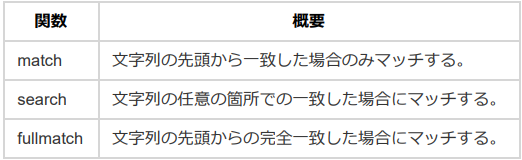

match, search, fullmatch 関数のパターンマッチの結果を⽰す。


In [ ]:
import re

str_tar = '100abc'

# 数字3個とabc
# pattern = \d{3}abc
pattern = '\d{3}abc'
print("\nstr='{}', pattern='{}'".format(str_tar, pattern))
m = re.match(pattern, str_tar)
print("match method: {}".format(bool(m)))
m = re.search(pattern, str_tar)
print("search method: {}".format(bool(m)))
m = re.fullmatch(pattern, str_tar)
print("fullmatch method: {}".format(bool(m)))

# 数字3個
# pattern = \d{3}
pattern = '\d{3}'
print("\nstr='{}', pattern='{}'".format(str_tar, pattern))
m = re.match(pattern, str_tar)
print("match method: {}".format(bool(m)))
m = re.search(pattern, str_tar)
print("search method: {}".format(bool(m)))
m = re.fullmatch(pattern, str_tar)
print("fullmatch method: {}".format(bool(m)))

# abc
# pattern = abc
pattern = 'abc'
print("\nstr='{}', pattern='{}'".format(str_tar, pattern))
m = re.match(pattern, str_tar)
print("match method: {}".format(bool(m)))
m = re.search(pattern, str_tar)
print("search method: {}".format(bool(m)))
m = re.fullmatch(pattern, str_tar)
print("fullmatch method: {}".format(bool(m)))


str='100abc', pattern='\d{3}abc'
match method: True
search method: True
fullmatch method: True

str='100abc', pattern='\d{3}'
match method: True
search method: True
fullmatch method: False

str='100abc', pattern='abc'
match method: False
search method: True
fullmatch method: False


これまで様々なパターンマッチの例をみてきた。

次にパターンマッチした値の取得について説明する。

値の取得は マッチオブジェクト.group() を利⽤する。

In [ ]:
import re

str_tar = '100abc'
pattern = '\d{3}'
m = re.match(pattern, str_tar)
print(m.group())

str_tar = 'abcabc'
pattern = 'a.*c'

# 最長マッチ
# abcとabcabcのように複数マッチする場合、長いほうを返す
m = re.match(pattern, str_tar)
print(m.group())

100
abcabc


### re.finditer

match, search, fullmatch 関数は

最初にパターンマッチした1個の⽂字列しか取得することができない。

finditer 関数を利⽤することでパターンマッチした全ての⽂字列を取得できる。


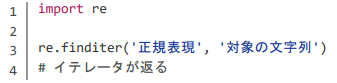

下記に基本的な利⽤例を⽰す。

In [ ]:
import re

str_tar = '100abc200abc300'
pattern = '\d{3}'

m_iter = re.finditer(pattern, str_tar)

# for文を利用してマッチオブジェクトを取得できる
for m in m_iter:
  print(m.group())

100
200
300


### re.findall

finditer 関数と同様に複数のパターンマッチした⽂字列を返す findall 関数を紹介する。

findall 関数は finditer 関数がイテレータを返していたのに対して、

パターンマッチした⽂字列を配列として取得できるとこ
ろが異なる。

下記に利⽤⽅法を⽰す。

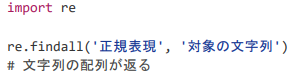

下記に基本的な利⽤例を⽰す。

In [ ]:
import re

str_tar = '100abc200abc300'
pattern = '\d{3}'

m_list = re.findall(pattern, str_tar)

print(m_list)


['100', '200', '300']


### re.split

split 関数は⽂字列をパターンマッチして、

マッチした箇所で⽂字列を分割して、分割した⽂字列のリストを返す。

下記に利⽤⽅法を⽰す。

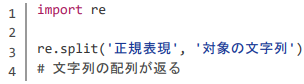

下記に基本的な利⽤例を⽰す。

In [ ]:
import re

str_tar = '100abc200abc300'
pattern = '\d{3}'

# 3個の数字を区切りとして文字列を区切る
m_list = re.split(pattern, str_tar)

print(m_list)

['', 'abc', 'abc', '']


### re.sub

sub 関数は⽂字列をパターンマッチして、

マッチした⽂字列を別の⽂字列に置き換えて、

置き換えた⽂字列を返す。

下記に利⽤⽅法を⽰す

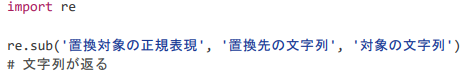

下記に基本的な利⽤例を⽰す。

In [ ]:
import re

str_tar = '100abc200abc300'
pattern = '\d{3}'

# 3個の数字を999に置換する
sub_str = re.sub(pattern, '999', str_tar)

print(str_tar)
print(sub_str)

100abc200abc300
999abc999abc999


## 練習問題

### 2-1.

次のプログラム中の⽂字列型の変数 x から正規表現を⽤いて全ての数字を抽出して、

抽出した数字の合計値を出⼒せよ。

In [ ]:
import re

x = "I have 100 yen. You have 200 yen."
# x = "This is 150 yen. The other is 150 yen."

# 以下にプログラムを記載する




出⼒結果は以下となる。

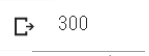

### 2-2.

ファイル名の⼀覧を格納したリスト型変数 files がある。

files 中から次の条件に⼀致するファイル名を出⼒せよ。

[条件]

- ファイル名は"ファイル識別⼦.拡張⼦"の形式であること。

- ファイル識別⼦は任意の1⽂字以上の⽂字列であること。

- 拡張⼦は"mp4"、"mov"、"avi"のいずれかであること。

- 拡張⼦の後ろに余分な⽂字列がないこと。

  例: ".mp44"、".mp4.png"

In [ ]:
import re
files = [
  'a.mp4', # True
  '1.mov', # True
  '#.avi', # True
  '123.avi.avi', # True
  '#.avi.png', # False
  'a.png', # False
  '.mp4', # False
  'aaa.mp44', # False
]
# 下記にプログラムを記載する




出⼒結果は以下となる。

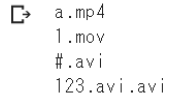

# 3. ⽋損値

本章では⽋損値について説明する。

まず⽋損値とは何かについて説明をして、次に⽋損値の処理について説明する。


## 3-1. ⽋損値とは

データの中に値の抜けがある場合、そのデータを⽋損値と呼ぶ。

例えばアンケートを取っており、特定の項⽬が
回答されていなかった場合、⽋損値が発⽣する。

⽋損値は扱い⽅次第での結果に影響を与えるため、削除や補間といった処理することが必要である。

## 3-2. ⽋損値の確認

Pandasでは⽋損値を NaN という⽂字で表す。

NaN がどのような場合に発⽣するかを確認するため、⽣徒5⼈分の英語、数学、理科の評価が5段階評価で記載し
た grade.csv を読み込む。

すると、値のない要素が NaN として表⽰されていることが確認できる。

このことから、Pandasの read_csvメソッド は値のない要素をデフォルトではNaN(⽋損値)として扱うことが分かる。

In [ ]:
import pandas as pd

grade = pd.read_csv('grade.csv')

print(grade)

   english  math  science
0        4   1.0      NaN
1        5   NaN      NaN
2        3   3.0      NaN
3        2   NaN      NaN
4        3   5.0      NaN


grade.csvは[ここ](https://github.com/TokitsuKotaro/PythonLesson/blob/main/grade.csv)からダウンロードできる。

## 3-3. ⽋損値のカウント

データに問題ないかを判断する上で、データの各列に含まれる⽋損値の数を知りたい場合がある。

DataFrameオブジェクト.count メソッドを利⽤することでDataFrameの各列の⽋損値を抜かした値の個数を取得で
きる。

データの⾏数から取得した値を引くことで⽋損値の数を求められる。

下記に基本的な利⽤例を⽰す。

In [ ]:
import pandas as pd
from numpy import NaN

grade = pd.read_csv('grade.csv')

print(grade.count())
print()

# DataFrame.shape[0]から行数を取得できる
print("number of data = {}".format(grade.shape[0]))
print(grade.shape[0] - grade.count())

english    5
math       3
science    0
dtype: int64

number of data = 5
english    0
math       2
science    5
dtype: int64


## 3-4. ⽋損値の処理

⽋損値に対する処理は、

①⽋損値を削除する、

②⽋損値を他の値に置き換える、

③⽋損値を補間する

などが存在する。

それぞれのやり⽅を説明する。

### ⽋損値の削除（.dropnaメソッド）

Seriesオブジェクト.dropna, DataFrameオブジェクト.dropna メソッドを利⽤することで⽋損値を削除できる。


DataFrameに利⽤した場合は⽋損値を含む⾏が削除される。


下記に利⽤例を⽰す。

In [ ]:
import pandas as pd
from numpy import NaN

grade = pd.read_csv('grade.csv')

print(grade)

print("\nSeries")
print(grade['math'].dropna())

# 行が削除されるため、空になる
print("\nDataFrame")
print(grade.dropna())

   english  math  science
0        4   1.0      NaN
1        5   NaN      NaN
2        3   3.0      NaN
3        2   NaN      NaN
4        3   5.0      NaN

Series
0    1.0
2    3.0
4    5.0
Name: math, dtype: float64

DataFrame
Empty DataFrame
Columns: [english, math, science]
Index: []


### ⽋損値の置換（.fillnaメソッド）

Seriesオブジェクト.fillna, DataFrameオブジェクト.fillna メソッドを利⽤することで⽋損値を置換できる。

下記に利⽤例を⽰す。

In [ ]:
import pandas as pd
from numpy import NaN

grade = pd.read_csv('grade.csv')
print(grade)

print("\nSeries")
print(grade['math'].fillna(2))

print("\nDataFrame")
print(grade.fillna(2))

   english  math  science
0        4   1.0      NaN
1        5   NaN      NaN
2        3   3.0      NaN
3        2   NaN      NaN
4        3   5.0      NaN

Series
0    1.0
1    2.0
2    3.0
3    2.0
4    5.0
Name: math, dtype: float64

DataFrame
   english  math  science
0        4   1.0      2.0
1        5   2.0      2.0
2        3   3.0      2.0
3        2   2.0      2.0
4        3   5.0      2.0


データ分析において⽋損値をそのカラムの平均値で置き換えることがよくある。

下記のようにすれば各カラムの⽋損値を平均値に置き換えることができる。

In [ ]:
import pandas as pd
from numpy import NaN

grade = pd.read_csv('grade.csv')
print(grade)

print("\nSeries")
print(grade['math'].fillna(grade['math'].mean()))

print("\nDataFrame")
print(grade.fillna(grade.mean()))

   english  math  science
0        4   1.0      NaN
1        5   NaN      NaN
2        3   3.0      NaN
3        2   NaN      NaN
4        3   5.0      NaN

Series
0    1.0
1    3.0
2    3.0
3    3.0
4    5.0
Name: math, dtype: float64

DataFrame
   english  math  science
0        4   1.0      NaN
1        5   3.0      NaN
2        3   3.0      NaN
3        2   3.0      NaN
4        3   5.0      NaN


### ⽋損値の補間

Seriesオブジェクト.fillna, DataFrameオブジェクト.fillna メソッドに引数を指定することで、前後の値に補間ができる。


**前のデータで補間**

引数に method='ffill' を指定する。

⼀つ前にデータがない場合は NaN が返る。


In [ ]:
import pandas as pd
from numpy import NaN

grade = pd.read_csv('grade.csv')
print(grade)

print("\nSeries")
print(grade['math'].fillna(method='ffill'))

print("\nDataFrame")
print(grade.fillna(method='ffill'))

   english  math  science
0        4   1.0      NaN
1        5   NaN      NaN
2        3   3.0      NaN
3        2   NaN      NaN
4        3   5.0      NaN

Series
0    1.0
1    1.0
2    3.0
3    3.0
4    5.0
Name: math, dtype: float64

DataFrame
   english  math  science
0        4   1.0      NaN
1        5   1.0      NaN
2        3   3.0      NaN
3        2   3.0      NaN
4        3   5.0      NaN


**後のデータで補間**

引数に method='bfill' を指定する。

⼀つ後にデータがない場合は NaN が返る。

In [ ]:
import pandas as pd
from numpy import NaN

grade = pd.read_csv('grade.csv')
print(grade)

print("\nSeries")
print(grade['math'].fillna(method='bfill'))

print("\nDataFrame")
print(grade.fillna(method='bfill'))


   english  math  science
0        4   1.0      NaN
1        5   NaN      NaN
2        3   3.0      NaN
3        2   NaN      NaN
4        3   5.0      NaN

Series
0    1.0
1    3.0
2    3.0
3    5.0
4    5.0
Name: math, dtype: float64

DataFrame
   english  math  science
0        4   1.0      NaN
1        5   3.0      NaN
2        3   3.0      NaN
3        2   5.0      NaN
4        3   5.0      NaN


**前後のデータで線形補間**

Seriesオブジェクト.interpolate, DataFrameオブジェクト.interpolate メソッドを利⽤することで、

前後の値から補間ができる。

In [ ]:
import pandas as pd
from numpy import NaN

grade = pd.read_csv('grade.csv')
grade['music'] = [1,NaN,NaN,NaN,5]
print(grade)

print("\nSeries")
print(grade['math'].interpolate())

print("\nDataFrame")
print(grade.interpolate())

   english  math  science  music
0        4   1.0      NaN    1.0
1        5   NaN      NaN    NaN
2        3   3.0      NaN    NaN
3        2   NaN      NaN    NaN
4        3   5.0      NaN    5.0

Series
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: math, dtype: float64

DataFrame
   english  math  science  music
0        4   1.0      NaN    1.0
1        5   2.0      NaN    2.0
2        3   3.0      NaN    3.0
3        2   4.0      NaN    4.0
4        3   5.0      NaN    5.0


## 練習問題

### 3-1.

下記DataFrameオブジェクトの各カラムの⽋損値の割合を出⼒せよ。

In [ ]:
import pandas as pd
from numpy import NaN

df = pd.DataFrame({
  'a': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'b': [NaN, NaN, NaN, NaN, 5, 6, 7, 8, 9, 10],
  'c': [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN],
})

# 以下にコードを記載




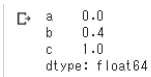

### 3-2.

1時間ごとの温度の推移のデータを持つDataFrameオブジェクトに対し、

温度データの⽋損値を以下の⽅法で処理した後に描画せよ。

[⽋損値の処理⽅法]
- NaNを削除
- NaNを前回値で上書き
- NaNを後⽅値で上書き
- NaNを線形補間


In [ ]:
import pandas as pd
from numpy import NaN
import matplotlib.pyplot as plt

df = pd.DataFrame({
  'time': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'temp': [20, 20, NaN, NaN, 50, 30, NaN, 20, 30, NaN, 25, 30],
})

# NaNを加工せずに描画
plt.title('normal')
plt.plot(df['time'], df['temp'], 'o-')
plt.show()

# NaNを削除して描画


# NaNを前回値で上書きして描画


# NaNを後方値で上書きして描画


# NaNを線形補間して描画



出⼒は以下となる。グラフのタイトルは以下に対応する。

- normal: NaNを加⼯せずに描画
- delete: NaNを削除して描画
- before: NaNを前回値で上書きして描画
- after: NaNを後⽅値で上書きして描画
- interpolate: NaNを線形補間して描画

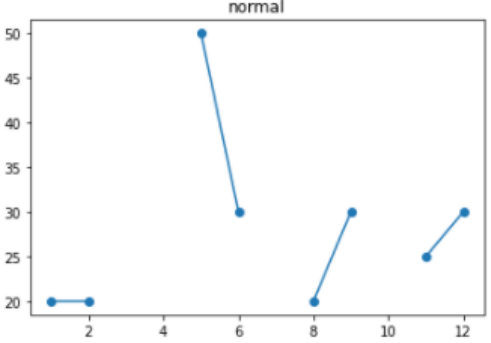

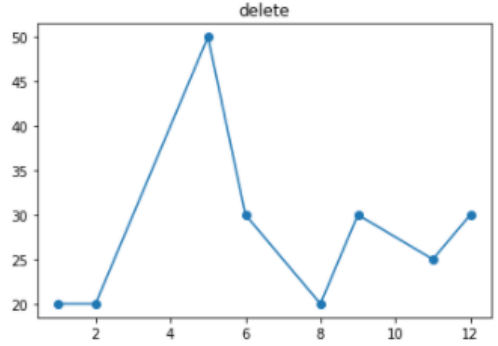

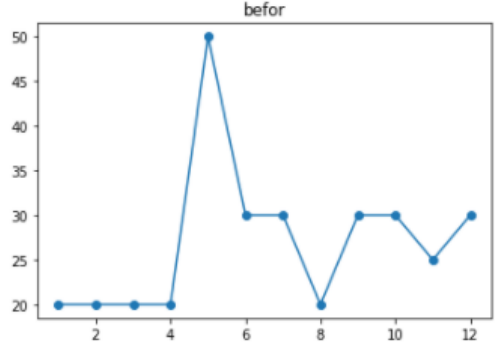

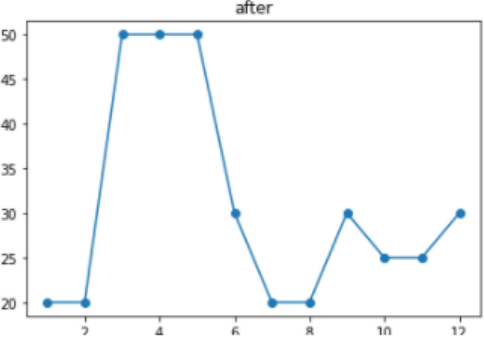

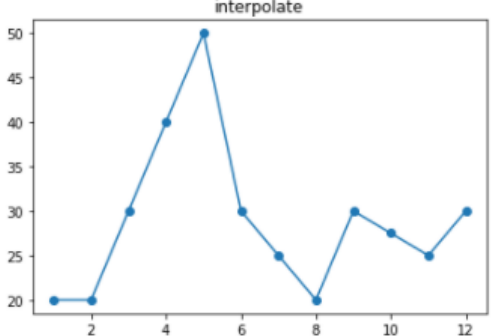

# 4. 整然データの作成

データ分析の観点から望ましいデータ形式になっているデータのことを整然データと呼ぶ。

本章では整然データを作成するためのテクニックを紹介する。

具体的には、散らばったデータを⼀つのテーブルにまとめるための

①連結 と ②結合 、

テーブルの列・⾏を分析しやすい形式に変更する

③ピボット/アンピボット 、

データに特定の処理を⾏い変換する

④メソッドについて紹介する。

## 4-1. データの連結

pandas.concat 関数を利⽤することでSeriesやDataFrameを連結することができる。


例えば、年ごとのファイルにデータが分かれている場合に、

全てのデータを⼀つのDataFrameとして扱いたい場合などに⽤いる。

下記に利⽤⽅法を⽰す。

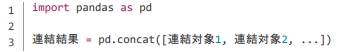

下記に基本的な利⽤例を⽰す。

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
  'name': ['Taro', 'Jiro'],
  'age': [20, 15]
})

df2 = pd.DataFrame({
  'name': ['Haruko', 'Natuko'],
  'age': [20, 30]
})

# DataFrameの表示
print("Data: df1")
print(df1)
print("\nData: df2")
print(df2)

# Seriesの連結表示
print("\nSeries")
print(pd.concat([df1['name'], df2['name']]))

# DataFrameの連結表示
print("\nDataFrame")
print(pd.concat([df1, df2]))

Data: df1
   name  age
0  Taro   20
1  Jiro   15

Data: df2
     name  age
0  Haruko   20
1  Natuko   30

Series
0      Taro
1      Jiro
0    Haruko
1    Natuko
Name: name, dtype: object

DataFrame
     name  age
0    Taro   20
1    Jiro   15
0  Haruko   20
1  Natuko   30


連結対象に存在しないカラムはNaNとなる。


In [ ]:
import pandas as pd

a = pd.DataFrame({
  'name': ['Taro', 'Jiro'],
  'age': [20, 15],
  'weight': [55, 45]
})

b = pd.DataFrame({
  'name': ['Haruko', 'Natuko'],
  'age': [20, 30]
})

# Data表示
print("Data: a")
print(a)
print("\nData: b")
print(b)

# DataFrameの連結表示
print("\nDataFrame")
print(pd.concat([a, b]))

Data: a
   name  age  weight
0  Taro   20      55
1  Jiro   15      45

Data: b
     name  age
0  Haruko   20
1  Natuko   30

DataFrame
     name  age  weight
0    Taro   20    55.0
1    Jiro   15    45.0
0  Haruko   20     NaN
1  Natuko   30     NaN


引数に axis=1 を指定することで、列⽅向の連結もできる。


データ数が⾜りない場合はNaNが⼊る。

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
  'name': ['Taro', 'Jiro', 'Saburo'],
  'age': [20, 15, 10],
})

df2 = pd.DataFrame({
  'weight': [55, 45]
})

# Data表示
print("Data: df1")
print(df1)
print("\nData: df2")
print(df2)

# Seriesの連結表示
print("\nSeries")
print(pd.concat([df1['name'], df2['weight']], axis=1))

# DataFrameの連結表示
print("\nDataFrame")
print(pd.concat([df1, df2], axis=1))

Data: df1
     name  age
0    Taro   20
1    Jiro   15
2  Saburo   10

Data: df2
   weight
0      55
1      45

Series
     name  weight
0    Taro    55.0
1    Jiro    45.0
2  Saburo     NaN

DataFrame
     name  age  weight
0    Taro   20    55.0
1    Jiro   15    45.0
2  Saburo   10     NaN


## 練習問題

### 4-1.

3つのデータフレームを⾏⽅向に連結した結果と列⽅向に連結した結果を表⽰せよ。


In [ ]:
import pandas as pd

a = pd.DataFrame({
  'name': ['Taro', 'Jiro'],
})

b = pd.DataFrame({
  'name': ['Haruko', 'Natuko'],
})

c = pd.DataFrame({
  'name': ['Saburo', 'Haruko'],
})

# 下記にコードを記載する




出⼒は以下となる。

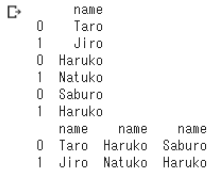

## 4-2. データの結合

データの連結では、複数のテーブルを⾏⽅向や列⽅向に単純にくっつける⽅法について紹介した。

データの結合では異なる形式のテーブルを共通の値をもとに⼀つにする⽅法を説明する。

### 結合とは

結合とは2つのテーブルの特定の列(カラム)を指定して、

それらの列で同じ値(キー)となる⾏を

1つの⾏にすることである。


結合の例を下記図に⽰す。

左側のテーブルのidカラムの値と

右側のテーブルのuser_idカラムの値をキーとして

結合した結果である。

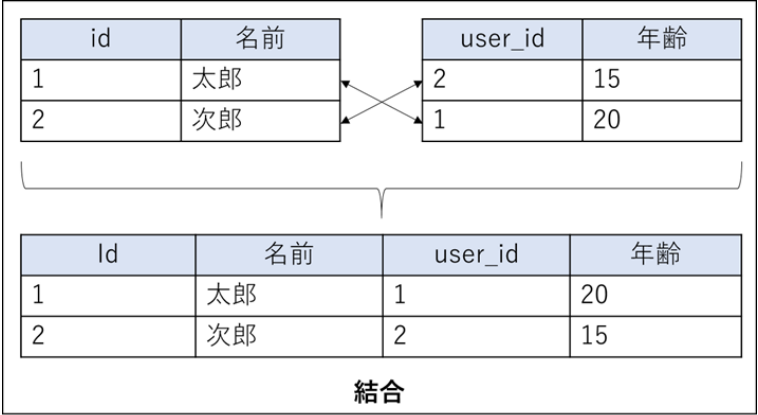

pandas.merge 関数を利⽤することでDataFrameを結合することができる。



In [ ]:
import pandas as pd

結合結果 = pd.merge(結合対象1, 結合対象2, left_on='結合対象1のキーの値を持つカラム', right_on='結合対象2のキーの値を持つカラム')

下記に基本的な利⽤例を⽰す。

In [ ]:
import pandas as pd

name = pd.DataFrame({
  'id': [1, 2],
  'name': ['Taro', 'Jiro'],
})

age = pd.DataFrame({
  'user_id': [2, 1],
  'age': [15, 20],
})

merge_result = pd.merge(name, age, left_on='id', right_on='user_id')

# Data表示
print("Data: name")
print(name)
print("\nData: age")
print(age)
print("\nMerge result")
print(merge_result)

Data: name
   id  name
0   1  Taro
1   2  Jiro

Data: age
   user_id  age
0        2   15
1        1   20

Merge result
   id  name  user_id  age
0   1  Taro        1   20
1   2  Jiro        2   15


### 結合の種類

結合には4つの種類があり、 pandas.merge 関数に引数 how='結合の種類' を指定することで結合⽅法を変更できる

In [ ]:
import pandas as pd

結合結果 = pd.merge(結合対象1, 結合対象2, left_on='結合対象1のキーの値を持つカラム', right_on='結合対象2のキーの値を持つカラム')

結合の種類ついて説明する。

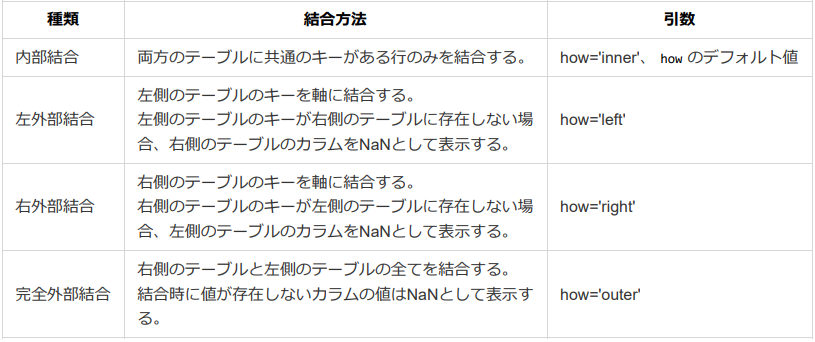

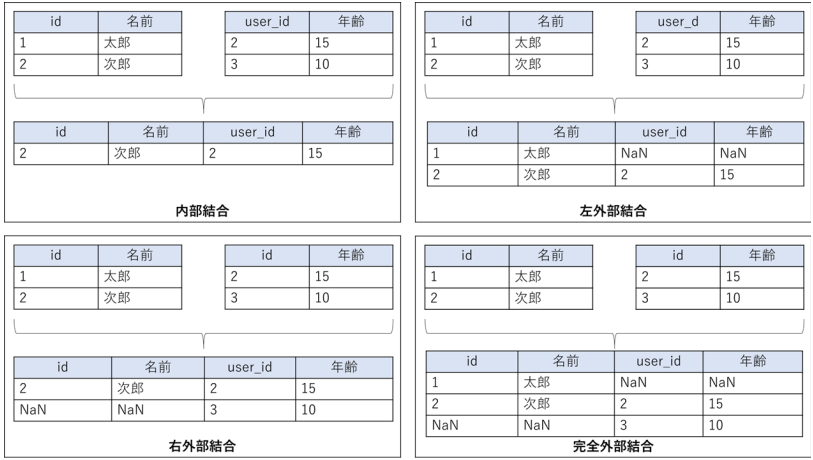

下記に基本的な利⽤例を⽰す。


In [ ]:
import pandas as pd
from numpy import NaN

name = pd.DataFrame({
  'id': [1, 2],
  'name': ['Taro', 'Jiro'],
})

age = pd.DataFrame({
  'user_id': [2, 3],
  'age': [15, 10],
})

merge_inner = pd.merge(name, age, left_on='id', right_on='user_id', how="inner")

merge_left = pd.merge(name, age, left_on='id', right_on='user_id', how="left")

merge_right= pd.merge(name, age, left_on='id', right_on='user_id', how="right")

merge_outer= pd.merge(name, age, left_on='id', right_on='user_id', how="outer")

# Data表示
print("Data: name")
print(name)
print("\nData: age")
print(age)

print("\nInner")
print(merge_inner)

print("\nLeft")
print(merge_left)

print("\nRight")
print(merge_right)

print("\nOuter")
print(merge_outer)

Data: name
   id  name
0   1  Taro
1   2  Jiro

Data: age
   user_id  age
0        2   15
1        3   10

Inner
   id  name  user_id  age
0   2  Jiro        2   15

Left
   id  name  user_id   age
0   1  Taro      NaN   NaN
1   2  Jiro      2.0  15.0

Right
    id  name  user_id  age
0  2.0  Jiro        2   15
1  NaN   NaN        3   10

Outer
    id  name  user_id   age
0  1.0  Taro      NaN   NaN
1  2.0  Jiro      2.0  15.0
2  NaN   NaN      3.0  10.0


**1対多の結合**

⼀⽅のテーブルのキー1つに対して、他⽅のテーブルのキーが複数対応する場合は

下記のように結合されて出⼒される。

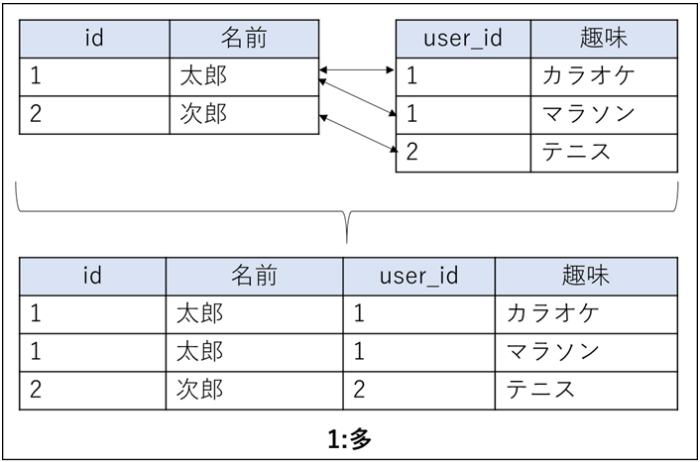


In [ ]:
import pandas as pd

name = pd.DataFrame({
  'id': [1, 2],
  'name': ['Taro', 'Jiro'],
})

hobby = pd.DataFrame({
  'user_id': [1, 1, 2],
  'hobby': ['Karaoke', 'Marathon', 'Tennis'],
})

merge_result = pd.merge(name, hobby, left_on='id', right_on='user_id')

# Data表示
print("Data: name")
print(name)
print("\nData: hobby")
print(hobby)

print("\nmerge result")
print(merge_result)

Data: name
   id  name
0   1  Taro
1   2  Jiro

Data: hobby
   user_id     hobby
0        1   Karaoke
1        1  Marathon
2        2    Tennis

merge result
   id  name  user_id     hobby
0   1  Taro        1   Karaoke
1   1  Taro        1  Marathon
2   2  Jiro        2    Tennis


**多対多の結合**

⼀⽅のテーブルのキー、他⽅のテーブルのキーが

多対多の関係にある場合は下記のようにキーがかけ合わせて結合されて出⼒される。


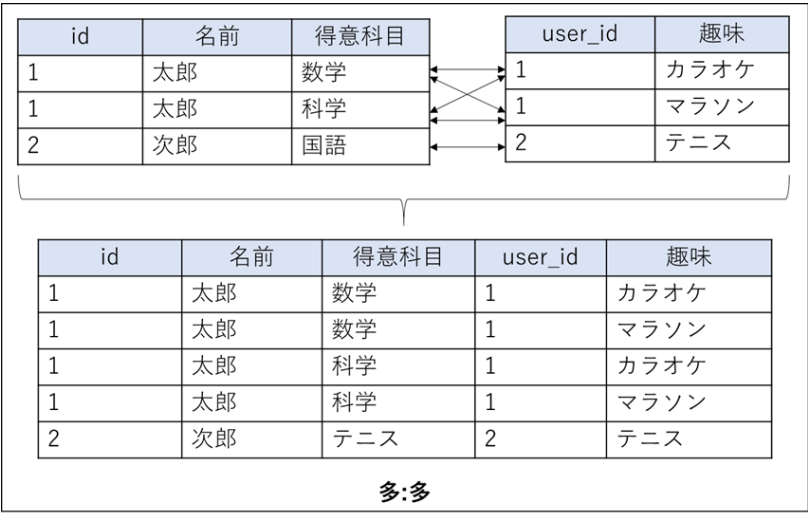

In [ ]:
import pandas as pd

name_subject = pd.DataFrame({
  'id': [1, 1, 2],
  'name': ['Taro', 'Taro', 'Jiro'],
  'subject': ['Math', 'National Language', 'Math'],
})

hobby = pd.DataFrame({
  'user_id': [1, 1, 2],
  'hobby': ['Karaoke', 'Marathon', 'Tennis'],
})

merge_result = pd.merge(name_subject, hobby, left_on='id', right_on='user_id')

# Data表示
print("Data: name and subject")
print(name_subject)
print("\nData: hoby")
print(hobby)

print("\nmerge result")
print(merge_result)

Data: name and subject
   id  name            subject
0   1  Taro               Math
1   1  Taro  National Language
2   2  Jiro               Math

Data: hoby
   user_id     hobby
0        1   Karaoke
1        1  Marathon
2        2    Tennis

merge result
   id  name            subject  user_id     hobby
0   1  Taro               Math        1   Karaoke
1   1  Taro               Math        1  Marathon
2   1  Taro  National Language        1   Karaoke
3   1  Taro  National Language        1  Marathon
4   2  Jiro               Math        2    Tennis


## 練習問題

### 4-2.

product.csvとorder1.csvを読み込み、product_idをキーに内部結合せよ。


product.csvとorder1.csvは[ここ](https://github.com/TokitsuKotaro/PythonLesson)からダウンロードできる。

In [ ]:
import pandas as pd

# 下記にコードを記載する




出力は以下となる。

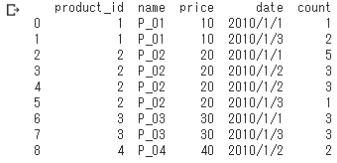

## 4-3. データのピボット/アンピボット

データの連結と結合では異なるテーブルを⼀つにする⽅法を学んだ。

ここでは⼀つのテーブルに対して列・⾏の変換操作をして

分析しやすいテーブルに変換する⽅法を説明する。

ピボットとアンピボットとは縦持ちのデータを

横持ちに変換、横持ちのデータを縦持ちに変換することである。

**横持ちデータ**

下記に⽰す各年度の商品ごとの売り上げ個数を管理しているテーブルがあるとする。

売り上げ個数に着⽬すると、データの種類を表す第1四半期〜第4四半期のカラムが並び、

それぞれのカラムに値を持つ。


売り上げ個数の値に関する情報は縦⽅向(何半期)と横⽅向(何年のどの商品)の両⽅をクロスして⾒る必要がある。

⼀般に、⼈が⾒てわかりやすいテーブルの形式となる。

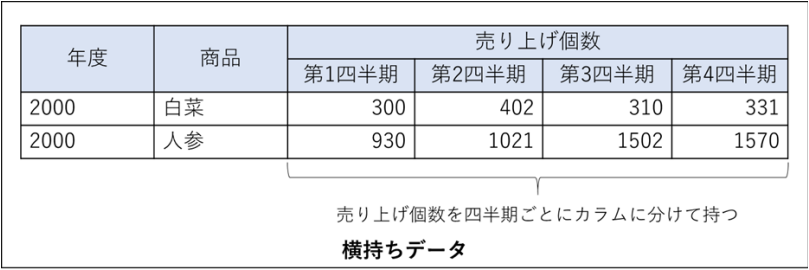


**縦持ちデータ**

上記のデータを縦持ちデータとして表現したテーブルを下記に⽰す。

売り上げ個数に着⽬すると、値の種類を表す四半期のカラムと値を表す売り上げ個数のカラムを独⽴して持ち、縦⽅向にデータを持つ。

この形式の場合、特定の年度と四半期についてある商品の売り上げ個数をみたい場合、縦（⾏）⽅向に探索するだけで参照できる。

データ分析においては、こちらの⽅が処理しやすい形式となる。

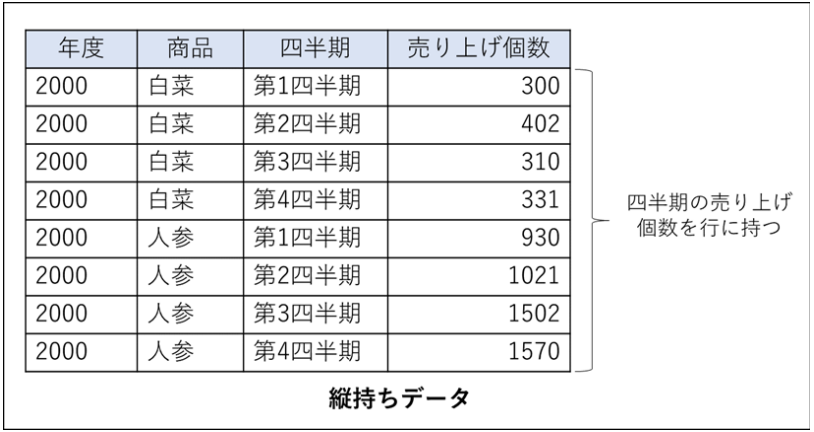

**ピボット**

DataFrameオブジェクト.pivot_table メソッドを利⽤することで縦持ちのデータを横持ちに変換できる。

下記に利⽤⽅法を⽰す。

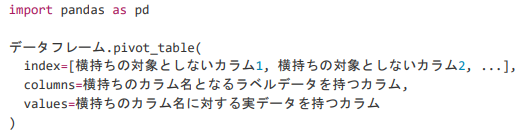


下記に基本的な利⽤例を⽰す。

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

sale = pd.DataFrame({
  'year': [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],
  'product': ['Chinese cabbage', 'Chinese cabbage', 'Chinese cabbage', 'Chinese cabbage', 'Carrot', 'Carrot', 'Carrot', 'Carrot'],
  'quarter': ['first quarter', 'second quarter', 'third quarter', 'fourth quarter', 'first quarter', 'second quarter','third quarter', 'fourth quarter',],
  'count': [300, 402, 310, 331, 930, 1021, 1502, 1570]
})

pivot_result = sale.pivot_table(
  index=['year', 'product'],
  columns='quarter',
  values='count',
)

print("Data: sale")
print(sale)

print("\nPivot result")
print(pivot_result)

# pivot_tableの結果、yearとproductがindexに移動している
# reset_indexを利用してyearとproductをカラムに戻す
print('\nreset_index')
print(pivot_result.reset_index())

Data: sale
   year          product         quarter  count
0  2000  Chinese cabbage   first quarter    300
1  2000  Chinese cabbage  second quarter    402
2  2000  Chinese cabbage   third quarter    310
3  2000  Chinese cabbage  fourth quarter    331
4  2000           Carrot   first quarter    930
5  2000           Carrot  second quarter   1021
6  2000           Carrot   third quarter   1502
7  2000           Carrot  fourth quarter   1570

Pivot result
quarter               first quarter  fourth quarter  second quarter  third quarter
year product                                                                      
2000 Carrot                     930            1570            1021           1502
     Chinese cabbage            300             331             402            310

reset_index
quarter  year          product  first quarter  fourth quarter  second quarter  third quarter
0        2000           Carrot            930            1570            1021           1502
1        200

**アンピボット**

pandas.melt 関数を利⽤することで横持ちのデータを縦持ちに変換することができる。

下記に利⽤⽅法を⽰す。

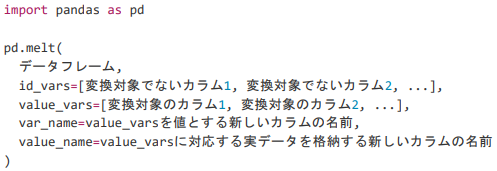

下記に基本的な利⽤例を⽰す。

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

sale = pd.DataFrame({
  'year': [2000, 2000],
  'product': ['Chinese cabbage', 'Carrot'],
  'first quarter': [300, 930],
  'second quarter': [402, 1021],
  'third quarter': [310, 1502],
  'fouth quarter': [331, 1570],
})

unpivot_result = pd.melt(
  sale,
  id_vars=['year', 'product'],
  # 指定しない場合はid_varsで指定していない全てのカラムが選択されるため、
  # 今回の場合は指定しなくても動作する。
  value_vars=['first quarter', 'second quarter', 'third quarter', 'fouth quarter'],
  var_name='quarter',
  value_name='count',
)

print("Data: sale")
print(sale)
print("\nUnpivot result")
print(unpivot_result)

Data: sale
   year          product  first quarter  second quarter  third quarter  fouth quarter
0  2000  Chinese cabbage            300             402            310            331
1  2000           Carrot            930            1021           1502           1570

Unpivot result
   year          product         quarter  count
0  2000  Chinese cabbage   first quarter    300
1  2000           Carrot   first quarter    930
2  2000  Chinese cabbage  second quarter    402
3  2000           Carrot  second quarter   1021
4  2000  Chinese cabbage   third quarter    310
5  2000           Carrot   third quarter   1502
6  2000  Chinese cabbage   fouth quarter    331
7  2000           Carrot   fouth quarter   1570


## 練習問題

### 4-3.

DataFrameを以下の設定でアンピボットせよ。

[設定]
- 変換対象でないカラム: year, shop_name
- 変換対象のカラム: 変換対象でないカラム以外全て
- 変換対象のカラムを値とする新しいカラムの名前: month
- 実データを格納する新しいカラムの名前: sales

In [ ]:
import pandas as pd

sale = pd.DataFrame({
  'year': [2000, 2000, 2001, 2001],
  'shop_name': ['shop 1', 'shop 2', 'shop 1', 'shop 2'],
  'january sales': [100, 2000, 300, 4000],
  'february sales': [150, 2500, 250, 3000],
  'march sales': [100, 2500, 225, 2000]
})

# 下記にコードを記載する




出⼒は以下となる。

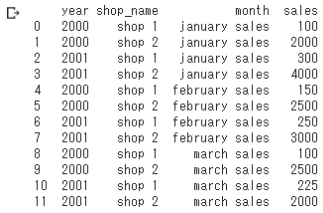

## 4-4. データへの関数適⽤

ここでは、データの各要素を対象とした⼀括変換処理について説明する。

Seriesオブジェクト.apply, DataFrameオブジェクト.apply メソッドを利⽤して、要素や列に対して関数を適⽤し、適⽤された新しいオブジェクトを返す。

map 関数のような使い⽅をする。下記に例を⽰す。

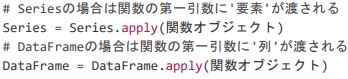


In [ ]:
import pandas as pd

df = pd.DataFrame({
  'name': ['Taro', 'Jiro'],
  'age': [20, 15]
})

print(df['age'].apply(lambda a: a * 2))
# 関数の第一引数に'列'として'nameカラム'や'ageカラム'が渡される。
print(df.apply(lambda a: a * 2))


0    40
1    30
Name: age, dtype: int64
       name  age
0  TaroTaro   40
1  JiroJiro   30


2個以上の引数を取る関数にapplyを適⽤することもできる。

適⽤する場合、第２引数以降の引数を 引数名=値 のよ
うにキーワード引数としてapplyの引数に指定する。

In [ ]:
import pandas as pd

def my_mult(x, e):
  return x * e

df = pd.DataFrame({
  'name': ['Taro', 'Jiro'],
  'age': [20, 15]
})

print(df['age'].apply(my_mult, e=3))
print(df.apply(my_mult, e=3))

0    60
1    45
Name: age, dtype: int64
           name  age
0  TaroTaroTaro   60
1  JiroJiroJiro   45


## 練習問題


### 4-4.

⽂字列を持つSeriesにmy_replace関数を適⽤した結果を表⽰せよ。

なお、my_replace関数はプログラム中のコメントを参考に⾃作すること。

In [ ]:
import pandas as pd
import re

def my_replace(x):
  """appleを含む文字列を'banana'に変換する関数
  appleを含む文字列なら'banana'を返す
  appleを含まない文字列なら、引数xを返す
  Args:
  x (str): 変換対象の文字列
  Returns:
  str: 変換後の文字列
  Examples:
  my_replace('i have apple') は 'banana' を返す
  my_replace('i have banana') は 'i have banana' を返す
  """
  # 下記にコードを記載する



s = pd.Series(['apple', 'i have apple', 'banana', 'i have banana'])
# 下記にSeriesのapplyメソッドを利用したコードを記載する



print(banana)

# 出力
# 0 banana
# 1 banana
# 2 banana
# 3 i have banana

出⼒は以下となる。

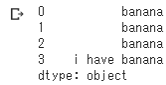

# 5. 課題

## 課題1.

以下の処理をして、売り上げの合計値を求め出⼒せよ

[予備知識]

product.csvは商品の詳細として商品番号(product_id)、商品名(name)、価格(price)を持つ。


order1.csv, order2.csvは取引の詳細として売上⽇(date)、商品番号(product_id)、個数(count)をデータとして持つ。


[処理]
- orser1.csv, order2.csv, product.csvをDataFrameとして読み込む(それぞれ、order1, order2, productと呼ぶ)

- order1とorder2を連結してorder(DataFrame)を作成する

- orderのDataFrameには⽋損値を含むため、⽋損値を含む⾏を削除したorder_wo_na(DataFrame)を作成する

- productとorder_wo_naのDataFrameと結合してmarge_product_order(DataFrame)を作成する
- 結合するキーは'product_id'とする

- marge_product_orderにpriceとcountをかけ合わせたカラムtotalを追加する
- 売り上げの合計を出⼒する

In [ ]:
import pandas as pd

# 下記にコードを記載する



# 出力
# 930.0

## 課題2.

課題1で作成したmarge_product_orderを利⽤して

商品ごとの売り上げの合計(商品ごとにtotalを合計し
た値)を表⽰せよ

In [ ]:
import pandas as pd

# 下記にコードを記載する



# 出力
# P_01 60.0
# P_02 320.0
# P_03 270.0
# P_04 280.0
# P_05 0.0